# Machine Learning

## HSE, 2024-25

# Seminar 3. Introduction to machine learning


## Task context





### Reminder about Retention
One of the most important business metrics for many companies is customer retention. In different areas, the specific method of calculation may vary, but it's always a number that shows how well we are keeping the customer.

The higher the customer retention, the more efficiently the budget allocated for advertising is spent, because a customer that has already been attracted stays with us longer. The most reliable way to retain customers is simply by creating the best product on the market. This task is very challenging, but sometimes even a good product is not enough to prevent a customer from leaving.

### Bribing Departing Customers

To retain a customer, companies often use a cheat code: at the moment when a customer is about to leave, the company can offer them a big discount or in some other way improve the terms to keep the customer. By retaining a customer now and spending some resources, the company expects to cover these costs in the future and come out ahead.

You've surely encountered such offers. Here are a few examples from real life:

* If you apply to transfer your phone number to another cell service provider, the current provider will almost always offer you a very favorable tariff not available to regular customers.

* If you haven't ordered food delivery from Elementary for some time, they will send you a promo code for a 30% discount.

    <a href="https://ibb.co/y5MH2cW"><img src="https://i.ibb.co/nfVxpNz/2024-04-06-04-33-18.png" alt="2024-04-06-04-33-18" border="0"></a>

* If you try to close a credit card, you may be offered to waive the annual fee for its maintenance instead of closing it.

What cases have you encountered? Share!

### Machine Learning for Churn Prediction

If we bribe the client even before he has made the decision to leave, then most likely we will be able to persuade him to stay for fewer resources. To understand which clients will soon think about leaving, we need to make predictions. That's exactly what machine learning does!

Today, we will work with [an open dataset](https://www.kaggle.com/barun2104/telecom-churn) from a telecom company. This is a table with numbers describing a customer at a certain point in time, as well as whether the event *“customer left within n months from the point described”* occurred or not. The average value across this binary column essentially represents the retention rate we're interested in.

<a href="https://ibb.co/swLhH2G"><img src="https://i.ibb.co/zRK1JrY/2021-12-04-12-06-43.png" alt="2021-12-04-12-06-43" border="0" width="60%" height="60%"></a>




### Additional Tasks

Before moving on to the main task, let's set ourselves some additional ones that will simultaneously serve as auxiliary, helping us approach the solution of the main problem from different angles.

Let's try to answer the following questions during the research:

* Is it possible in principle to separate potential churn users by their features in a metric space without knowing in advance who among them is actually a churner?
* Do we have any other (smaller) groups of users who might influence churn or perhaps precede it?

### Short summary
So, as the primary outcome of our task, we have the following hypotheses/conclusions about the area under consideration:

* Product improvement is the main source of a high retention rate
* Outgoing customers can somehow be bribed to stay
* In order to bribe customers cheaper, we need to find those who are going to leave earlier. ML is used for this purpose
* To understand how much money we can bribe a client with, we need to calculate well. We will deal with this some other time, but it is also necessary to keep this in mind.


## Building a baseline

To show the full power of machine learning, we will now quickly make predictions without processing the data in any way (or, in other words, build a so-called baseline), and in the future we will improve it in various ways.

Almost always, when you want to solve some real problem, it is worth building a baseline at the very beginning: the quality that we receive will be the initial value, and we will record all changes in relation to it in the future.

In [ ]:
# Download our dataset
! wget https://www.dropbox.com/s/ofr99e7skcd515m/telecom_churn.csv

--2025-02-14 16:55:47--  https://www.dropbox.com/s/ofr99e7skcd515m/telecom_churn.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/t0vxmjim9sdzqhaw3g2qs/telecom_churn.csv?rlkey=qlwbfmma1vfo24b0j6025wc4h [following]
--2025-02-14 16:55:47--  https://www.dropbox.com/scl/fi/t0vxmjim9sdzqhaw3g2qs/telecom_churn.csv?rlkey=qlwbfmma1vfo24b0j6025wc4h
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc95d98a9fb66d86350242110aa7.dl.dropboxusercontent.com/cd/0/inline/CkFXVXy-6wjVGLRdzYcwEXLAB47gM2HI0wHfGkO17KfKUIIdOrHkErqycI6KZUWrv58R21T6ZElQUF7Yvil-128FzvkgCle86HA93EBojpXzFSlr69EuTXxpGZdQvb3bqQAwvW9HKnlCdxCRT-tj9YGF/file# [following]
--2025-02-14 16:55:48--  https://uc95d98a9fb66d86350242110aa7.dl.dropboxusercontent.co

Let's read the data

In [ ]:
import pandas as pd
import numpy as np

# Read our dataset using the pandas library
data = pd.read_csv('telecom_churn.csv')

In [ ]:
# Let's take a look at our dataset
data.sample(10)

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
1826      0           102                1         0       0.00   
2534      0            81                1         0       0.00   
314       0           128                1         0       0.00   
1180      0            72                1         0       0.00   
3063      0            63                1         1       3.29   
1912      1           103                1         0       0.00   
2906      0            87                1         1       0.00   
2701      0            66                0         0       0.28   
2954      0            57                1         0       0.00   
844       0           146                1         1       3.94   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
1826              3    200.6       106           48.0        7.63       7.7  
2534              1    115.3        99           39.0       11.24      18.0  
314               0    125.2        99           39.0       10.27      18.9  
1180              0    207.8        92           52.0        9.79      13.1  
3063              1    190.0       137           75.9        5.83      12.2  
1912              8    150.6       125           40.0        8.46      10.4  
2906              1    165.8       122           45.0        9.35       0.0  
2701              3    208.7        84           53.8        8.67       8.3  
2954              3    161.0       113           46.0       10.40       8.4  
844               1    176.6        88           83.4        8.14      14.6

What can we see from the data? What kind of task is this: regression or classification?

Let's look at how many objects of each class we have and what is the proportion of the first class:


In [ ]:
print(f"The size of the zero class: {sum(data.Churn == 0)}")
print(f"The size of the first class:  {sum(data.Churn == 1)}")
print(f"The proportion of the first class:   {sum(data.Churn == 1) / len(data.Churn)}")

The size of the zero class: 2850
The size of the first class:  483
The proportion of the first class:   0.14491449144914492


In [ ]:
data.shape

(3333, 11)

Let's divide the table into features (what can be used for prediction) and labels (what we are going to predict, the target variable)

In [ ]:
X = data.drop(columns='Churn')
y = data['Churn']

Now let's divide the features and tags into two parts: train and validation. We're not going to do the test part right now, and here's why:

* We are still doing stupid testing of the method. I.e. there will be no data leak. We'll tell you what it is right after the stupid algorithm.

* The data for the test part should be collected separately so that it definitely does not look like train, due to the fact that they were collected on the same date, or collected by one person, or for some not entirely honest reason.

* We have little data, and the quality of the algorithms will decrease significantly if we take the data for the test as well.


To implement the division into training and test (valid), we will use the classic `train_test_split` function from the `sklearn` library.

By the way, the `sklearn` library is a standard library in Data Science that contains various metrics, data preprocessing methods, classical machine learning models, and much more. From now on, we will use this wonderful library regularly!

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
# Let's look at the training part of the data
X_train

AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
2046           120                1         0       0.00              1   
747            155                1         0       0.34              1   
180             94                0         1       2.57              4   
2968           160                1         0       0.00              1   
534             67                1         0       0.22              4   
...            ...              ...       ...        ...            ...   
3313           127                1         0       0.00              1   
3325            78                1         0       0.23              2   
1414           182                1         0       0.35              1   
1691            95                1         0       0.00              2   
1867           142                0         1       2.65              0   

      DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
2046    149.2        98           42.0        9.68      11.1  
747     184.6       102           52.4        9.80       7.8  
180     197.1       125           77.7       10.73       9.5  
2968    234.9       136           63.0       13.54      13.9  
534     310.4        97           61.2        3.33       9.2  
...       ...       ...            ...         ...       ...  
3313    102.8       128           30.0        7.19      10.0  
3325    193.4        99           45.3        5.85       9.3  
1414    176.1        90           48.5        8.75       9.7  
1691    269.0       120           66.0       11.69       7.3  
1867    191.1       109           72.5        7.48       9.8  

[2666 rows x 10 columns]

To solve our problem, we need to use some algorithm that classifies objects. One such algorithm we already know is the kNN algorithm, or its full name, the k-nearest neighbors algorithm.

To apply the algorithm, we import the classifier class from the neighbors module of the sklearn library, the main library for a data scientist, as we have already discovered.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Let's create a knn classifier object with 5 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=5)

Now, let's call the method **`.fit(X, y)`**. For models in sklearn, this method triggers training on the provided data.
* X — a matrix with the dimension [**number of training objects** $\times$ **number of features for each object**], where each cell contains the value of a specific feature for a specific object

* y — a vector with the dimension [**number of training objects**], where each cell contains either 0 or 1:
    - 0 - the customer stayed with us,
    - 1 - the customer left.

To be more honest, the k-nearest neighbors method learns simply by memorizing the values of the objects in the training dataset, — and so the **`.fit(X, y)`** method will execute very quickly — the knn object just needs to save the data we passed to it.

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Now, let's make predictions using the method **`.predict(X)`**.

Note that in the **`.fit(X, y)`** method, we supplied a matrix with features and a vector with the correct answers. In the **`.predict(X)`** method, we only supply a matrix with features because we want to make a prediction and assume that the correct (labeled) answers may not be available to us.

The column numbers in the matrix that we supplied to **`.fit(X, y)`** and **`.predict(X)`** must match. That is, if the feature "average minutes per call" was third in the matrix we supplied to the **`.fit(X, y)`** method, then it must also be third in the matrix we supply to the **`.predict(X)`** method.

In [ ]:
preds_valid = knn.predict(X_valid)
preds_valid

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

After receiving the predictions, you need to check how good they turned out to be. Let's use the accuracy, precision and recall metrics. We will talk in more detail about these metrics at a seminar dedicated to the classification task, and now we will just briefly describe what they are:
* `accuracy` — the proportion of correctly predicted objects
* `precision` — the proportion of correctly marked objects of class 1 among all objects marked with a unit (here we do not look at how many objects we have marked, that is, even if we marked only one object with class one and guessed right, then this metric will be equal to the maximum value — one, or 100 percent)
* `recall` — the proportion of correctly labeled objects of class 1 among all objects of class 1.

**NOTE:** `precision` and `recall` are the accuracy and completeness of our algorithm's responses

In [ ]:
# These metrics are implemented in the metrics module of the sklearn library
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Let's calculate the metrics for our algorithm
print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
print(f'Precision = {precision_score(y_valid, preds_valid)}')
print(f'Recall    = {recall_score(y_valid, preds_valid)}')

Accuracy  = 0.8860569715142429
Precision = 0.717948717948718
Recall    = 0.3010752688172043


We come to a very interesting situation, accuracy = 89%. In other words, for 89% of the objects in the validation sample, we predict the outcome correctly!

**It seems to be very good! Well, does it turn out that we go for champagne and close the course tab? 🍾🍾🍾🍾**

**NOTE:** The numbers for metric values may vary depending on random_seed and the version of the sklearn library.

No, unfortunately, not everything is so rosy: precision = 72% and recall = 30%. And this means that

* Among those for whom we predicted 1 (i.e. decided that they would leave), only a little more than two thirds were actually going to leave;
* Among those who actually left, we found only 30%. That is, even if we had offered the most generous offer designed to retain a customer, we would have been able to retain only 30% of such customers.


Anyway, these are the results that you and I have received within the baseline, and in future work we will focus on them!

## Auxiliary Clustering

It seems that after building and running our baseline, it's time to recall the additional tasks announced at the beginning of the seminar, which could now be very useful for our analysis.

To solve these tasks, let's use the `k-means` clustering algorithm to understand whether it is possible in principle to separate high—quality clients from non-high-quality ones, and the `DBSCAN` method - in order to find out how many different clusters (segments) are allocated globally for clients.

We will omit the specific details of the implementation of these algorithms for now and return to them later in our course in the section "Unsupervised learning".

In [ ]:
# Importing the necessary algorithms from the cluster module of the sklearn library
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
# Let's create an object of the k-means class with the number of clusters equal to 2, and an object of the DBSCAN class with default parameters
kmeans = KMeans(n_clusters=2, random_state=0)
dbscan = DBSCAN()

# Let's train them on a training dataset
kmeans.fit(X_train)
dbscan.fit(X_train)

# And we'll make a prediction on it
y_kmeans = kmeans.predict(X_train)
y_dbscan = dbscan.labels_

In [ ]:
# Let's Look at the kmeans Response: How Many Elements in Cluster 1 and How Many in Cluster 0
print(f"Elements in the zero cluster: {len(y_kmeans[y_kmeans == 0])}, in the first: {len(y_kmeans[y_kmeans == 1])}")

Elements in the zero cluster: 1370, in the first: 1296


In [ ]:
# Let's see which cluster contains what percentage of class 1
print(f"The zero cluster contains {len(y_train[(y_kmeans == 0) & (y_train == 1)]) / len(y_train[y_train == 1])} from class 1")
print(f"The first cluster contains  {len(y_train[(y_kmeans == 1) & (y_train == 1)]) / len(y_train[y_train == 1])} from class 1")

The zero cluster contains 0.3974358974358974 from class 1
The first cluster contains  0.6025641025641025 from class 1


It's not possible to make a definitive conclusion, even though one cluster has 20% more churners. The two clusters obtained are not significantly different from each other in terms of the presence of churned subscribers. It's necessary to process the dataset and, perhaps, try again.

In [ ]:
# Let's Look at the DBSCAN Responses: How Many Clusters It Identified (-1 is Given to Objects That It Considers Outliers)
# For this purpose, we can use, for example, the `unique` function from the numpy library.
print(f"Number of clusters: {np.unique(y_dbscan)}")

Number of clusters: [-1]


It's evident that DBSCAN combined all the data into one cluster. We can try to achieve a greater number of clusters by experimenting with the `eps` parameter, which defines the proximity radius of points.

In [ ]:
# In a loop, let's iterate through `eps` values from 0.001 to 0.5 and print the parameter value at which we ended up with more than 1 cluster
# A set of equidistant points between given boundaries can be specified using the `linspace` function from the numpy library.
for eps in np.linspace(0.001, 0.5, 50):
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(X_train)
    y_dbscan = dbscan.labels_
    if len(np.unique(y_dbscan)) - 1 > 1:
        print(eps, len(np.unique(y_dbscan)) - 1)

As we can see, this also didn't help us much, which means either our data lacks distinct geometric structures, or it's not possible to identify them with raw data.

In any case, all the actions performed indicate that the data needs to be preprocessed and prepared for subsequent model application!

## Exploratory Data Analysis

Of course, if we want to significantly improve the quality of our algorithm, we will not be able to do without the good old EDA. Let's try to apply a few basic approaches within this stage, and then together we'll see how this affects our model.




### Target variable analysis

Let's take another look at the target. In our case, the target variable is Churn: churn is 1 when the client left, and 0 when the client stayed.

Let's look at how many objects of each class are represented in the data, and what is the proportion of the first class of all objects.

In [ ]:
print(f"The size of the zero class: {sum(data.Churn == 0)}")
print(f"The size of the first class:  {sum(data.Churn == 1)}")
print(f"The proportion of the first class:   {sum(data.Churn == 1) / len(data.Churn)}")

The size of the zero class: 2850
The size of the first class:  483
The proportion of the first class:   0.14491449144914492


We see that among all the customers represented in the dataset, 14.5% of customers have left. Accordingly, there is some class imbalance, but not too much.

If we had a 50-50 or so distribution, then we could use a simple **accuracy** metric as the main one. But due to the distribution of 85 by 15, we can no longer do this and we will have to use **precision**, **recall**, **roc auc** and other more advanced metrics.

Returning to the imbalance of classes — despite the fact that the imbalance is not very significant and, as a result, it is not necessary to make a **stratified** division into train/val/test — we will do it anyway (and we advise you to always resort to this if you are building a classification, since this is a "free" way to guarantee the same the distribution of classes). What is this approach to separation? It turns out that **Stratified** separation means that we do not just randomly divide the data into train/val/test, but make it so that if the train part contains, for example, 70% of the dataset rows, then it will necessarily also contain exactly 70% of objects with class 1.

<a href="https://ibb.co/f0YNCjw"><img src="https://i.ibb.co/MND1RF0/image.png" alt="image" border="0"></a>

Stratified splitting is especially effective for situations with highly imbalanced samples. However, as noted earlier, using it for normal samples almost carries no drawbacks.

### Feature Analysis

Let's start by checking for missing values. If the missing values have been replaced with something and we don't see them now, we will definitely notice them later when we draw graphs for all features.

In [ ]:
# # Let's see if there are gaps in our data using the isna method and aggregating functions
X.isna().any().any()

False

Hooray, there are no passes!

Let's now look at the types of features.



**Numerical features:**

1. AccountWeeks
2. DataUsage
3. CustServCalls
4. DayMins
5. DayCalls
6. MonthlyCharge
7. OverageFee
8. RoamMins

**Categorical features:**

1. ContractRenewal
2. DataPlan


We see that we have only two columns with categorical features, and the values in these columns are 0 or 1. Clearly, there's no need to encode these features using one-hot encoding or any other algorithm — we'll just leave them as they are.

The only thing left to do is to look at the distributions to make sure there are no anomalies within them.

In [ ]:
# Let's calculate how many times each unique value occurs in the Contract Renewal column using the value_counts method
data['ContractRenewal'].value_counts()

ContractRenewal
1    3010
0     323
Name: count, dtype: int64

In [ ]:
# Let's calculate how many times each unique value occurs in the Data Plan column using the value_counts method
data['DataPlan'].value_counts()

DataPlan
0    2411
1     922
Name: count, dtype: int64

Everything is absolutely fine!

### Working with physical features

Physical feature are often the most pleasant feature to process. Three very useful tools for analyzing such features:

* Histograms of features
* Correlations of different variables
* Pairwise graphs

Such tools will help you understand the data better, which in turn will simplify the further selection of machine learning models and other things. In our situation, we will draw these graphs in order to continue to train the general viewability.

Let's start with the histograms.

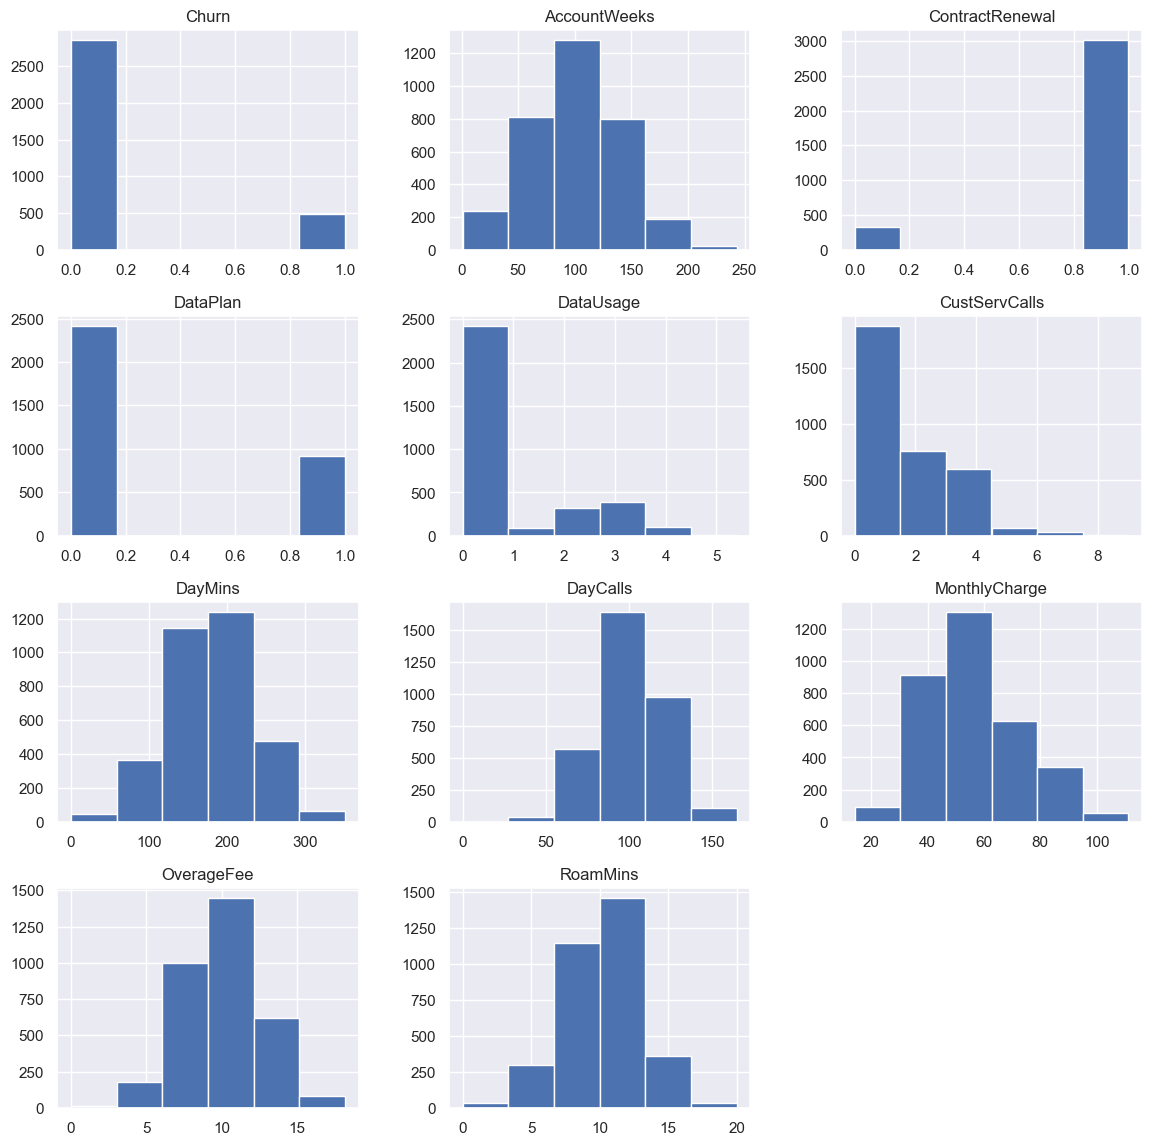

In [ ]:
# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Style improver in matplotlib
sns.set()

# Let's build histograms of our data with the number of bins 6
data.hist(bins=6, figsize=(14,14));

Everything looks quite good!

Let's move on to correlations.


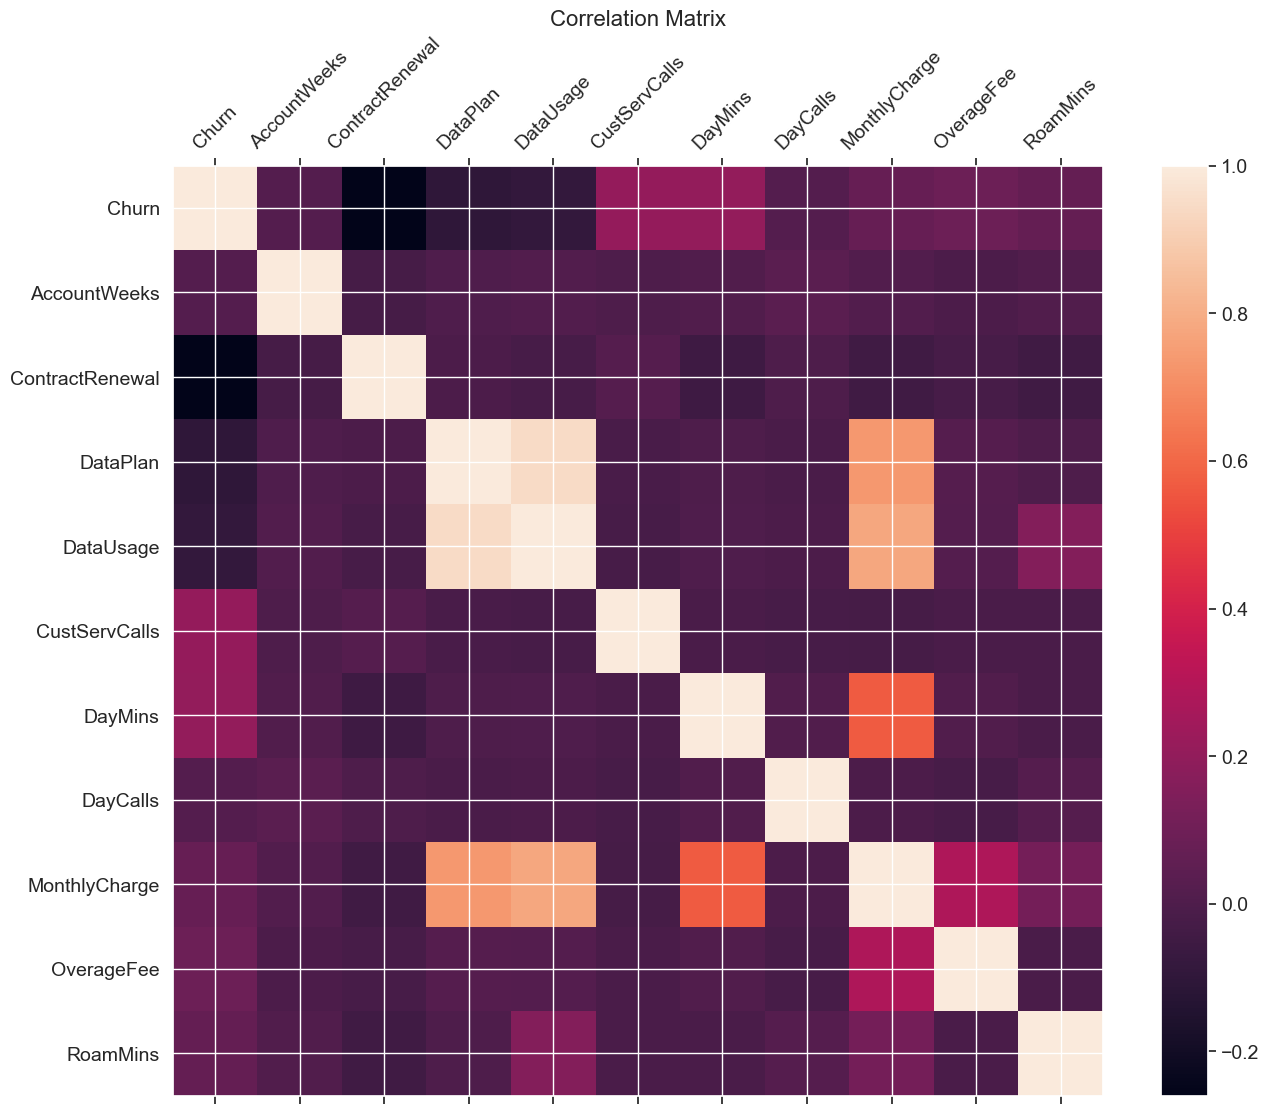

In [ ]:
f = plt.figure(figsize=(15, 12))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

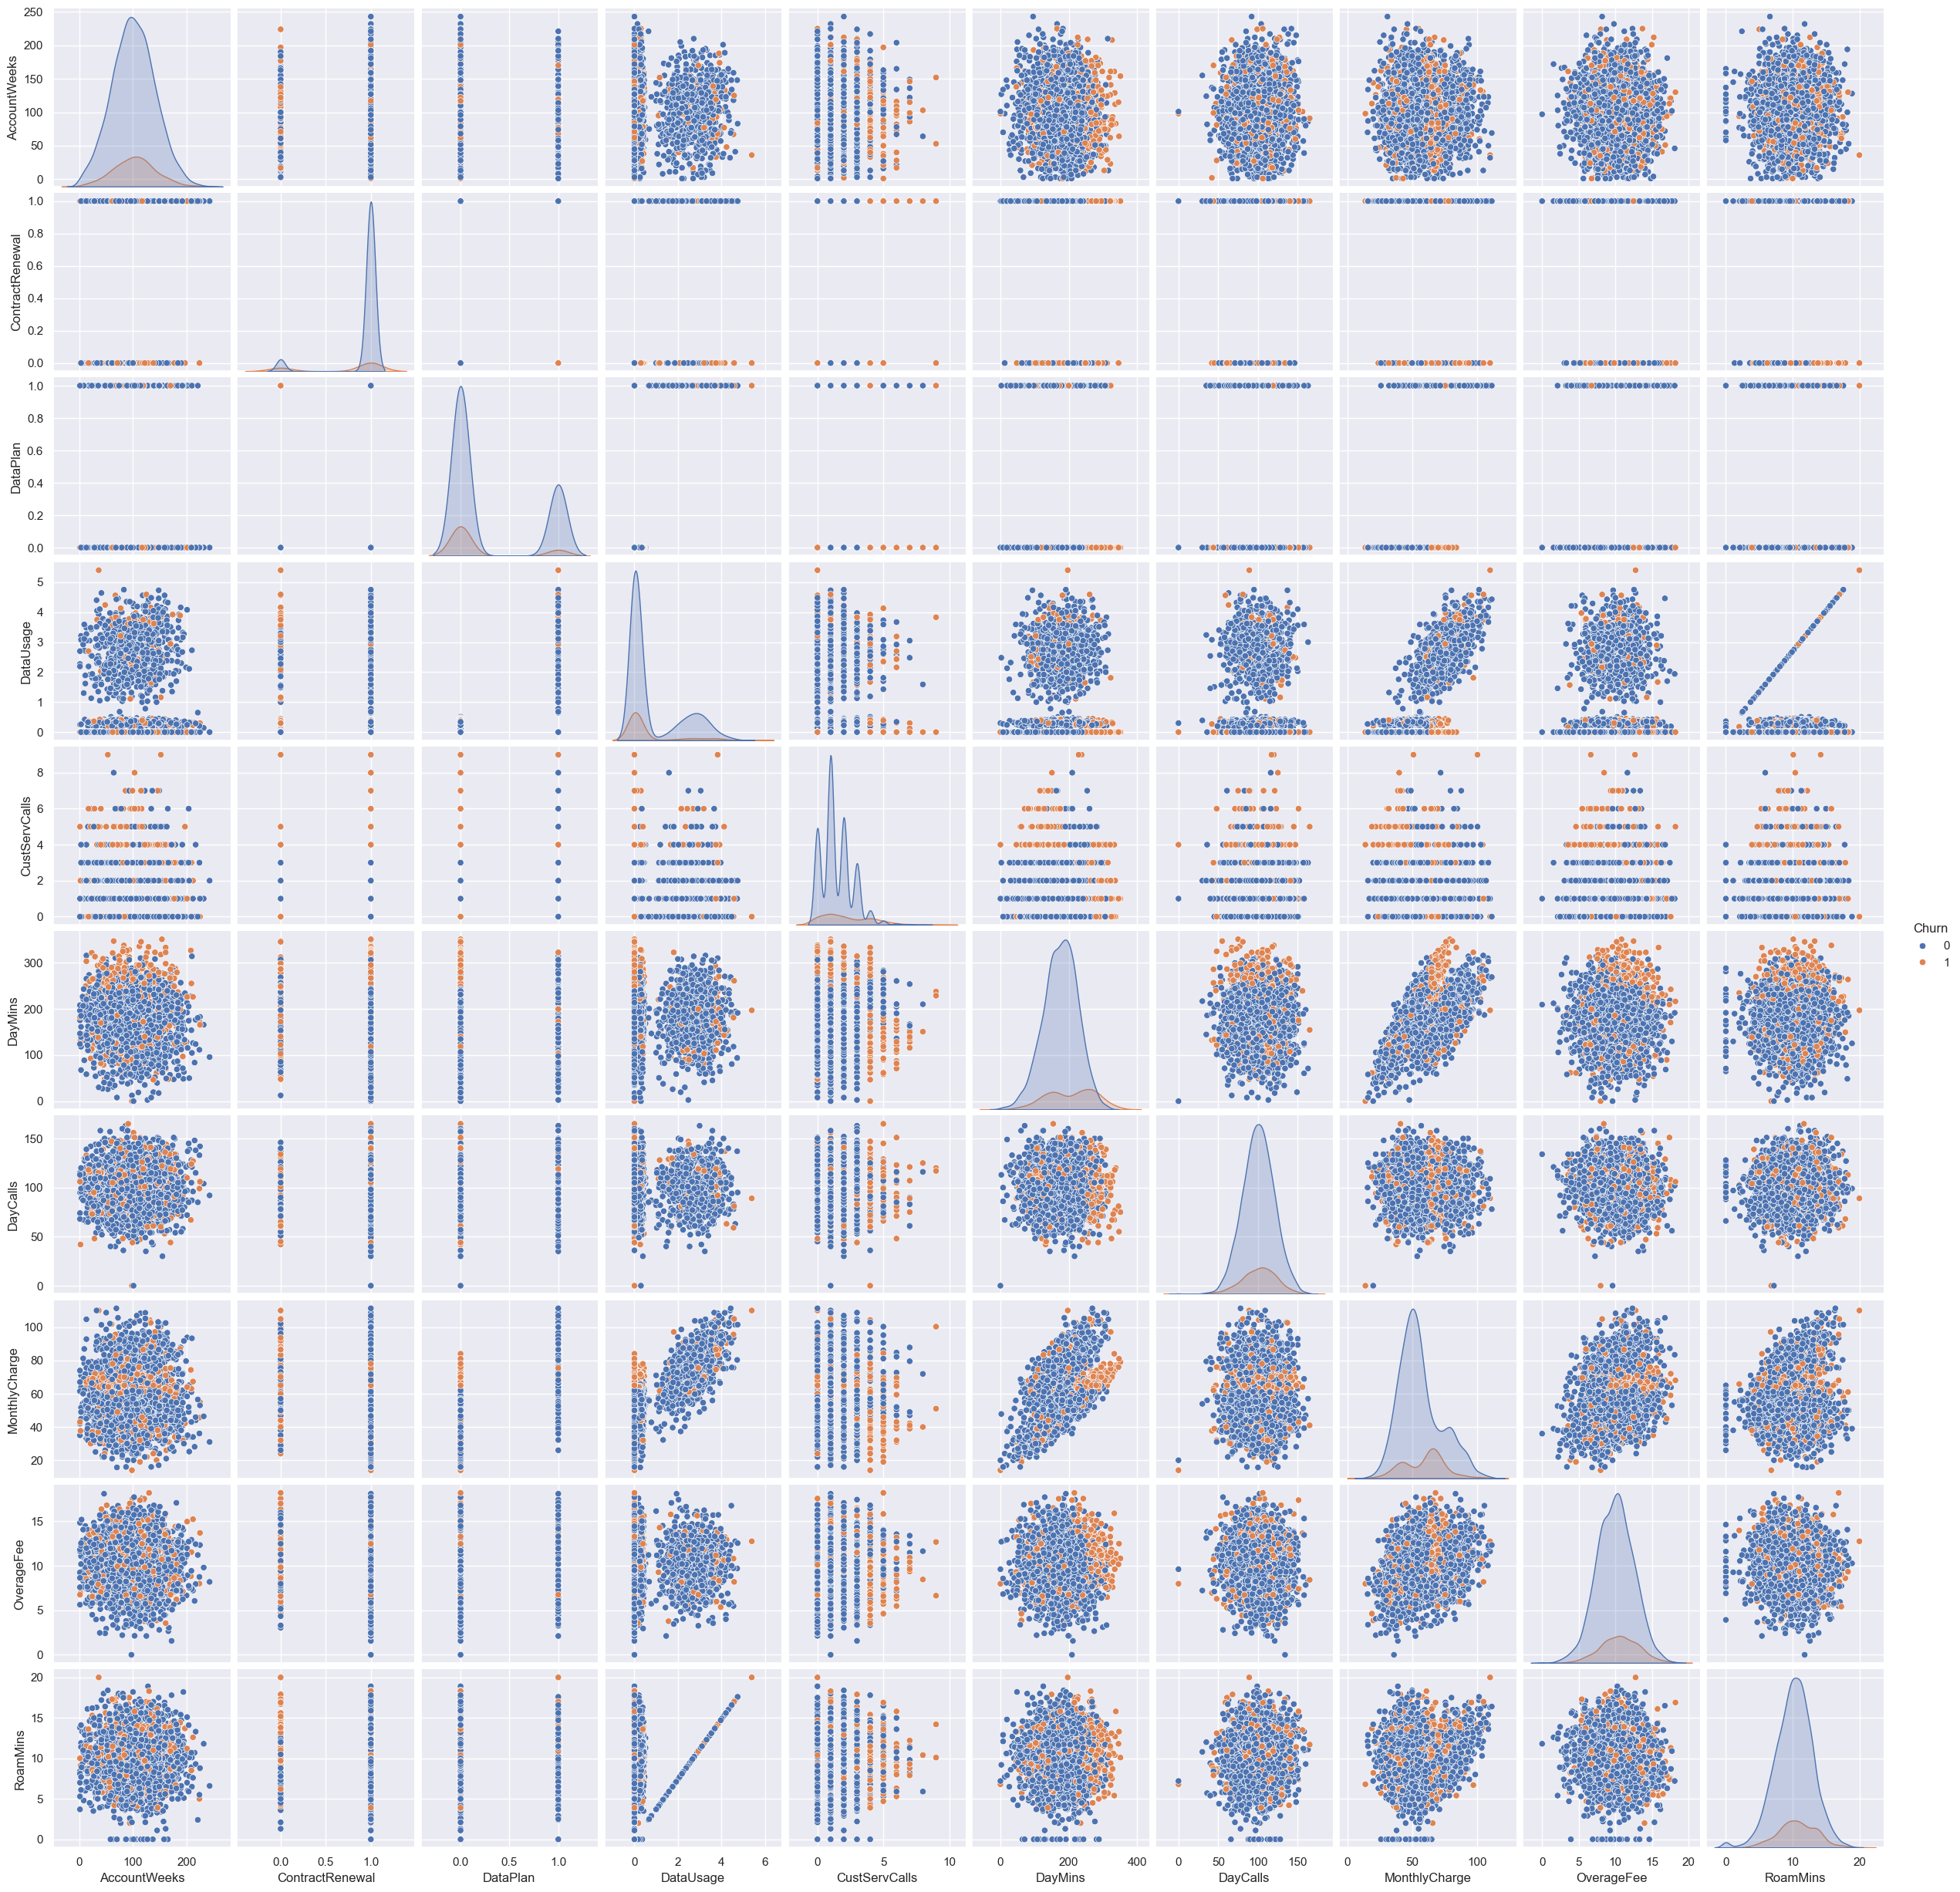

In [ ]:
# Using the pairplot function of the seaborn library, we will build graphs for each pair of features (specify the 'Churn' column as the point colors)
sns.pairplot(data, hue='Churn')

Interestingly, if we look at the schedule of the joint distribution of CustServCalls and DayMin, we will see that there are two distinct groups for users leaving us.
1. Those who don't talk much (DayMins is small), but call the CustomerService a lot
2. Those who talk a lot (DayMins is big), but call the CustomerService a little

In general, in these graphs we see the interaction of three variables. This information is very useful for creating new features (Feature Extraction, Feature Transformation), removing old ones (Feature Selection) and selecting algorithms.

A clearer understanding of how to use such graphs will come to you with experience!

## Algorithm Analysis

Today, we're focusing on the k-nearest neighbors algorithm. We've already discussed this algorithm in the lecture.

<a href="https://ibb.co/d6MCxhX"><img src="https://i.ibb.co/QnQSt5h/2021-12-04-22-09-15.png" alt="2021-12-04-22-09-15" border="0" width=50%></a>

K nearest neighbors is a very well—studied algorithm, it is even theoretically ideal: if we have an infinite dataset for training, then with the help of knn we can restore the entire dependence completely. In fact, an endless dataset is not even needed. We just need to have enough examples near each point of the space so that we can estimate the probability for each of the classes well.

Knn's biggest problem is the curse of dimensionality. When we have a lot of features, the density of training examples in n-dimensional space decreases sharply.

<a href="https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/"><img src="https://www.visiondummy.com/wp-content/uploads/2014/04/curseofdimensionality.png" alt="2021-12-04-22-09-15" border="0" width=70%></a>

With an increase in dimensionality, more and more objects of the training sample are found in the "corners" of the feature space.

<a href="https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/"><img src="https://www.visiondummy.com/wp-content/uploads/2014/04/sparseness.png" alt="2021-12-04-22-09-15" border="0" width=70%></a>


From this, the strengths and weaknesses of KNN emerge.

Pros:
* A good baseline.
* Good interpretability with a small number of features.
* Fast on small and medium-sized data.
* Theoretically ideal and makes no assumptions about the dependency.

Cons:
* Requires a good space and metric to work effectively. That is, it necessitates feature selection, dimensionality reduction, standardization of features, etc.
* If some assumptions can be made about the nature of the data, they need to be incorporated into the model through the creation of new features or changing the metric, which is very challenging and requires experience.

### Improving Model Performance

The absence of missing values significantly simplifies our task.

Let's carry out the following steps to improve the performance of our algorithm:

* Standardize the features.
* Reduce dimensionality using Principal Component Analysis (PCA), which we will cover in detail in the seminar on linear algebra. Today, we'll discuss the intuition behind it. Judging by the correlation graphs, we can reduce the dimensionality by 3-5 without any loss.
* Iterate over metrics and k-neighbors, using a simple Grid Search.

In [ ]:
# Let's do the same pipeline with data loading, division into features and targets, and division into training and test, as before
data = pd.read_csv('telecom_churn.csv')

X = data.drop(columns='Churn')
y = data['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)


Standardizing features before applying PCA is crucial.

In fact, even without PCA, we would need to standardize the features because the KNN algorithm doesn't perform well when features are on different scales.

For example, imagine that on the x1 axis, we have the apartment's area in tens of square meters, and on the x2 axis, the seller's rating of the noise level in the apartment due to the road. Due to the different units of measurement on the x2 axis, the x1 axis will have very little weight.

<img src="https://i.stack.imgur.com/OCUmI.png" alt="2021-12-04-22-09-15" border="0" width=49%> <img src="https://i.stack.imgur.com/J5r01.png" alt="2021-12-04-22-09-15" border="0" width=49%>

Let's get acquainted with a new type of object in sklearn: Transformer. They have two main methods: `.fit()` and `.transform()`. These objects learn from the training set and can then transform data. In our case, Standard Scaler, during training, memorizes the mean and variance for each feature. Afterward, it normalizes the data using these statistical parameters.

$$x_{new} = \frac{x-mean}{std}$$

Generally, normalizing features is almost always a good idea. It's very important for:
* Metric-based algorithms
* Linear algorithms (we will learn that for linear algorithms, it's beneficial not only to normalize the features but ideally to make their distribution as close to normal as possible). Linear algorithms include various types of regressions as well as PCA, which we will use below.

Normalization is perhaps only unimportant for algorithms based on decision trees, which we will discuss later in our course.

In [ ]:
# Importing the StandardScaler class from the preprocessing module of the sklearn library
from sklearn.preprocessing import StandardScaler

# Creating an instance of the StandardScaler class
scaler = StandardScaler()

# Let's train him on a training dataset
scaler.fit(X_train, y_train)

StandardScaler()

In [ ]:
# Apply the trained scaler to the training and validation datasets using the transform method
X_train_normed = scaler.transform(X_train)
X_valid_normed = scaler.transform(X_valid)

Great! Now let's apply PCA (Principal Component Analysis). We will talk about it in more detail in a lecture later on. The necessity of using this algorithm without a lecture explanation is due to the practical orientation of our seminar. It's much more valuable to see how something works in an appropriate context than to omit a necessary algorithm just because it's scheduled for a later lecture.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/300px-GaussianScatterPCA.svg.png" alt="2021-12-04-22-09-15" border="0" width=30%>

Conceptually, the algorithm works as follows:
* Among all directions, we look for the direction along which the variance of the data is the greatest and fix this direction as the first component.
* Then, among all directions perpendicular to the first, we look for the direction with the greatest variance. This is the second component.
* Next, among all directions perpendicular to the first and second, we look for the direction with the greatest variance. This is the third component.
And so on...

Afterwards, we only keep the first k components, and as new features, we take the projections of the old points onto these directions. This results in k new features.

The illustration shows that if two features are highly correlated (when one is large, the other tends to be large as well, and vice versa), we can take just one number instead of two and lose almost no information.

Deciding exactly how many features to keep is a challenging task; people usually just experiment with different values :)

In [ ]:
# Let's look at the size of the initial features
X_train.shape

(2666, 10)

In [ ]:
# Importing the PCA method from the decomposition module of the sklearn library
from sklearn.decomposition import PCA

# Let's create an object of the PCA class with the number of main components equal to 7
pca = PCA(n_components = 7)

# Let's train PCA on normalized features
pca.fit(X_train_normed, y_train)

PCA(n_components=7)

In [ ]:
# Transform our data using the transform method
X_train_pca = pca.transform(X_train_normed)
X_valid_pca = pca.transform(X_valid_normed)

### The final model

In [ ]:
# Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
preds_valid = knn.predict(X_valid_pca)

# Testing
print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
print(f'Precision = {precision_score(y_valid, preds_valid)}')
print(f'Recall    = {recall_score(y_valid, preds_valid)}')

Accuracy  = 0.896551724137931
Precision = 0.7592592592592593
Recall    = 0.422680412371134


Hooray! We've improved both metrics — precision and recall. Now, let's try to create a custom GridSearch — a search through a grid of hyperparameters. It might not be the most elegant solution, but it should be very illustrative (hopefully :) ).

In [ ]:
precisions = []
recalls = []

# In a double loop, we will draw the entire pipeline described above in terms of the number of components and the number of neighbors
for pca_components in [10, 9, 8, 7, 6, 5]:
    for k_neighbors in [1, 2, 4, 5, 7]:
        scaler = StandardScaler()
        scaler.fit(X_train, y_train)
        X_train_normed = scaler.transform(X_train)
        X_valid_normed = scaler.transform(X_valid)

        pca = PCA(pca_components)
        pca.fit(X_train_normed, y_train)

        X_train_pca = pca.transform(X_train_normed)
        X_valid_pca = pca.transform(X_valid_normed)

        # Model
        knn = KNeighborsClassifier(n_neighbors=k_neighbors)
        knn.fit(X_train_pca, y_train)
        preds_valid = knn.predict(X_valid_pca)

        # Testing
        print(f'Hyper parameters: pca_components={pca_components}, k_neighbors={k_neighbors}')
        print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
        precisions.append(precision_score(y_valid, preds_valid))
        print(f'Precision = {precisions[-1]}')
        recalls.append(recall_score(y_valid, preds_valid))
        print(f'Recall    = {recalls[-1]}')
        print()

Hyper parameters: pca_components=10, k_neighbors=1
Accuracy  = 0.8650674662668666
Precision = 0.5346534653465347
Recall    = 0.5567010309278351

Hyper parameters: pca_components=10, k_neighbors=2
Accuracy  = 0.8830584707646177
Precision = 0.7111111111111111
Recall    = 0.32989690721649484

Hyper parameters: pca_components=10, k_neighbors=4
Accuracy  = 0.8875562218890555
Precision = 0.75
Recall    = 0.3402061855670103

Hyper parameters: pca_components=10, k_neighbors=5
Accuracy  = 0.896551724137931
Precision = 0.7413793103448276
Recall    = 0.44329896907216493

Hyper parameters: pca_components=10, k_neighbors=7
Accuracy  = 0.8950524737631185
Precision = 0.7647058823529411
Recall    = 0.4020618556701031

Hyper parameters: pca_components=9, k_neighbors=1
Accuracy  = 0.8650674662668666
Precision = 0.5346534653465347
Recall    = 0.5567010309278351

Hyper parameters: pca_components=9, k_neighbors=2
Accuracy  = 0.8830584707646177
Precision = 0.7111111111111111
Recall    = 0.32989690721649484


In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Model metrics')

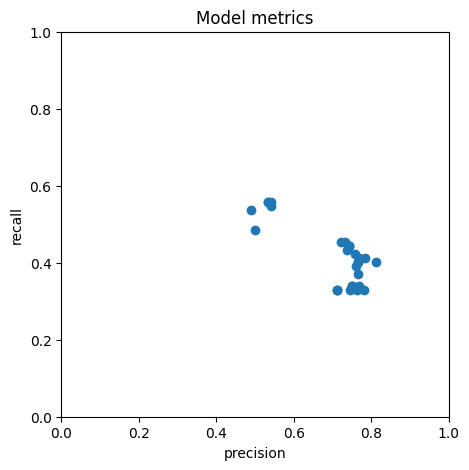

In [ ]:
plt.figure(figsize=(5, 5))

# Let's draw metrics on the scatter chart
plt.scatter(precisions, recalls)

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Model metrics')

The choice of the best set of parameters is dictated by the domain — that is, how costly it is for us to falsely identify a customer as churning and how costly it is to miss a potentially churning customer. Reflections on this matter are left to the reader :)

In [ ]:
precisions1 = []
recalls1 = []

X_train1 = X_train.drop(['DataPlan', 'MonthlyCharge'], axis = 1)
X_valid1 = X_valid.drop(['DataPlan', 'MonthlyCharge'], axis = 1)

# In a double loop, we will draw the entire pipeline described above in terms of the number of components and the number of neighbors
for pca_components in [8, 7, 6, 5, 4, 3]:
    for k_neighbors in [1, 2, 4, 5, 7]:
        scaler = StandardScaler()
        scaler.fit(X_train1, y_train)
        X_train_normed = scaler.transform(X_train1)
        X_valid_normed = scaler.transform(X_valid1)

        pca = PCA(pca_components)
        pca.fit(X_train_normed, y_train)

        X_train_pca = pca.transform(X_train_normed)
        X_valid_pca = pca.transform(X_valid_normed)

        # Model
        knn = KNeighborsClassifier(n_neighbors=k_neighbors)
        knn.fit(X_train_pca, y_train)
        preds_valid = knn.predict(X_valid_pca)

        # Testing
        print(f'Hyper parameters: pca_components={pca_components}, k_neighbors={k_neighbors}')
        print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
        precisions1.append(precision_score(y_valid, preds_valid))
        print(f'Precision = {precisions1[-1]}')
        recalls1.append(recall_score(y_valid, preds_valid))
        print(f'Recall    = {recalls1[-1]}')
        print()

Hyper parameters: pca_components=8, k_neighbors=1
Accuracy  = 0.8665667166416792
Precision = 0.54
Recall    = 0.5567010309278351

Hyper parameters: pca_components=8, k_neighbors=2
Accuracy  = 0.8800599700149925
Precision = 0.6888888888888889
Recall    = 0.31958762886597936

Hyper parameters: pca_components=8, k_neighbors=4
Accuracy  = 0.8845577211394303
Precision = 0.7380952380952381
Recall    = 0.31958762886597936

Hyper parameters: pca_components=8, k_neighbors=5
Accuracy  = 0.8980509745127436
Precision = 0.7543859649122807
Recall    = 0.44329896907216493

Hyper parameters: pca_components=8, k_neighbors=7
Accuracy  = 0.8980509745127436
Precision = 0.8085106382978723
Recall    = 0.3917525773195876

Hyper parameters: pca_components=7, k_neighbors=1
Accuracy  = 0.8545727136431784
Precision = 0.5
Recall    = 0.5463917525773195

Hyper parameters: pca_components=7, k_neighbors=2
Accuracy  = 0.8740629685157422
Precision = 0.6666666666666666
Recall    = 0.26804123711340205

Hyper parameters:

Text(0.5, 1.0, 'Model metrics')

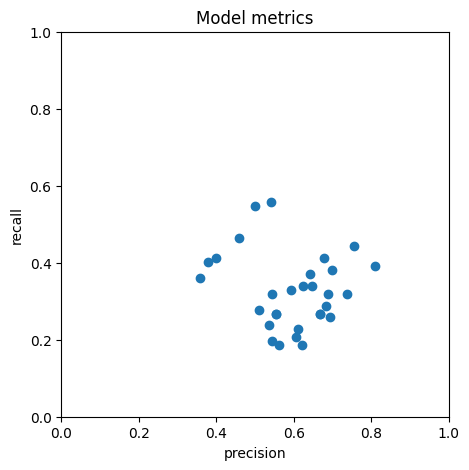

In [ ]:
plt.figure(figsize=(5, 5))

# Let's draw metrics on the scatter chart
plt.scatter(precisions1, recalls1)

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Model metrics')

In [ ]:
max(recalls)

0.5567010309278351

In [ ]:
max(recalls1)

0.5567010309278351

In [ ]:
max(precisions)

0.8125

In [ ]:
max(precisions1)

0.8085106382978723